In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract
import json
import loguru as logger
from QrcodeDecoder import QrcodeDecoder

In [14]:
info_qr = QrcodeDecoder("Escaneo.jpg")
image = cv.imread("Escaneo.jpg")

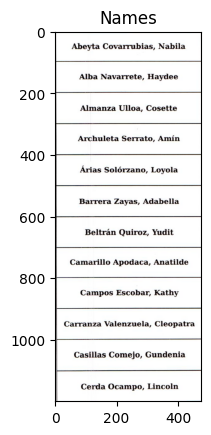

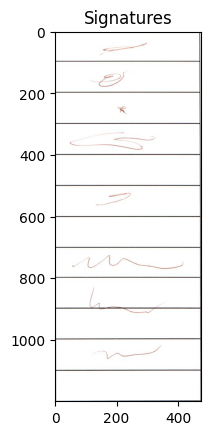

In [15]:
separation_names = image[370:1570,150:625]
separation_signatures = image[370:1570,625:1100]

plt.imshow(separation_names,cmap='gray', vmin=0, vmax=255)
plt.title('Names')
plt.show()
plt.imshow(separation_signatures,cmap='gray', vmin=0, vmax=255)
plt.title('Signatures')
plt.show()

In [16]:
names = pytesseract.image_to_string(separation_names)
names = names.strip().split("\n\n")
print(names)

['Abeyta Covarrubias, Nabila', 'Alba Navarrete, Haydee', 'Almanza Ulloa, Cosette', 'Archuleta Serrato, Amin', 'Arias Solorzano, Loyola', 'Barrera Zayas, Adabella', 'Beltran Quiroz, Yudit', 'Camarillo Apodaca, Anatilde', 'Campos Escobar, Kathy', 'Carranza Valenzuela, Cleopatra', 'Casillas Comejo, Gundenia', 'Cerda Ocampo, Lincoln']


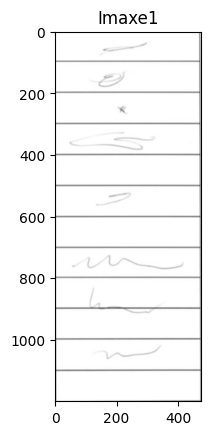

In [17]:
separation_signatures_gray = cv.cvtColor(separation_signatures, cv.COLOR_BGR2GRAY)
kernel = np.ones((5,5),np.float32)/25
separation_signatures_gray = cv.filter2D(separation_signatures_gray,-1,kernel)


plt.imshow(separation_signatures_gray,cmap='gray', vmin=0, vmax=255)
plt.title('Imaxe1')
plt.show()

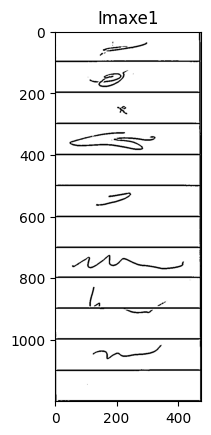

In [19]:
th3 = cv.adaptiveThreshold(separation_signatures_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
separation_signatures_gray = cv.bitwise_not(th3)


plt.imshow(th3,cmap='gray', vmin=0, vmax=255)
plt.title('Imaxe1')
plt.show()

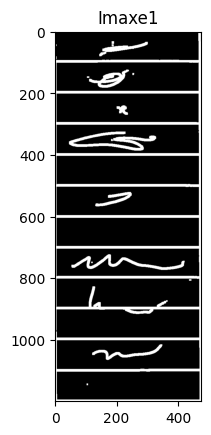

In [20]:
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(separation_signatures_gray,kernel,iterations = 1)

plt.imshow(dilation,cmap='gray', vmin=0, vmax=255)
plt.title('Imaxe1')
plt.show()

In [21]:
values_names={}
y = 20  # Valor inicial de y

for i in names:
    temporal_photo=dilation[y:y+70, 140:350]
    conContornos = cv.cvtColor(temporal_photo,cv.COLOR_GRAY2RGB)
    contours, _ = cv.findContours(temporal_photo, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    # Criterio para determinar si hay firma: cantidad de contornos
    if len(contours) > 0:  # Ajusta este número según la calidad de la imagen
        values_names[i]="Firmado"
    else:
        values_names[i]="No firmado"
    y += 100  # Incrementar y en cada iteración

In [22]:
print(info_qr.get_all_labels())
print(json.dumps(values_names, indent=4))
logger.logger.info("Acabado con éxito")

2025-02-27 20:16:49.082 | INFO     | __main__:<module>:3 - Acabado con éxito


['1/3-2024-01-08']
{
    "Abeyta Covarrubias, Nabila": "Firmado",
    "Alba Navarrete, Haydee": "Firmado",
    "Almanza Ulloa, Cosette": "Firmado",
    "Archuleta Serrato, Amin": "Firmado",
    "Arias Solorzano, Loyola": "No firmado",
    "Barrera Zayas, Adabella": "Firmado",
    "Beltran Quiroz, Yudit": "No firmado",
    "Camarillo Apodaca, Anatilde": "Firmado",
    "Campos Escobar, Kathy": "Firmado",
    "Carranza Valenzuela, Cleopatra": "No firmado",
    "Casillas Comejo, Gundenia": "Firmado",
    "Cerda Ocampo, Lincoln": "No firmado"
}
